In [1]:
!python -V

Python 3.11.5


In [2]:
import tensorflow as tf
tf.__version__

2023-12-20 02:58:52.798918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.15.0'

In [3]:
import tensorflow.lite as tflite

In [12]:
interpreter = tflite.Interpreter(model_path='convnet_from_scratch_original_data.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [13]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

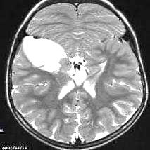

In [14]:
#img = download_image('https://github.com/Optimistix/Brain_Tumor_Detection_using_MRI_Images_from_Kaggle_Br35H/blob/main/y234.jpg')
img = download_image('https://raw.githubusercontent.com/Optimistix/Brain_Tumor_Detection_using_MRI_Images_from_Kaggle_Br35H/main/y234.jpg')

img = prepare_image(img, target_size=(150, 150))
img

In [15]:
import numpy as np

In [16]:
def prepare_input(x):
    return x / 255.0

In [17]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [18]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [19]:
preds

array([[0.9496046]], dtype=float32)

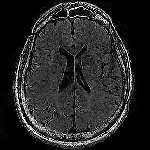

In [21]:
img_neg = download_image('https://raw.githubusercontent.com/Optimistix/Brain_Tumor_Detection_using_MRI_Images_from_Kaggle_Br35H/main/no333.jpg')

img_neg = prepare_image(img, target_size=(150, 150))
img_neg

In [22]:
x = np.array(img_neg, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [24]:
preds

array([[0.33496115]], dtype=float32)